# 6大回归模型预测航班票价

In [4]:
#数据处理
import pandas as pd 
import numpy as np 
pd.set_option('display.max_columns', 33)  #最多显示33列

# 可视化
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

# 建模 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
#模型评价
from sklearn.metrics import accuracy_score,confusion_matrix

# 忽略notebook中的警告
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel("E:/git/python_Visualization-example/datasets/Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
# 数据形状
df.shape

(10683, 11)

In [7]:
# 缺失值
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# 字段类型
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
# 全部字段
columns = df.columns.tolist()
columns

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']

Airline：不同类型的航空公司

Date_of_Journey：旅客的旅行开始日期

Source：旅客出发地

Destination：旅客目的地

Route：航班路线

Dep_Time：出发时间

Arrival_Time：抵达时间

Duration：持续时间；指的是航班完成从出发到目的地的旅程的整个时间

Total_Stops：总共停留地

Additional_Info：其他信息，比如：食物、设备信息等

Price：整个旅程的航班票价

In [10]:
# 数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
# 价格price的信息
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## 缺失值处理

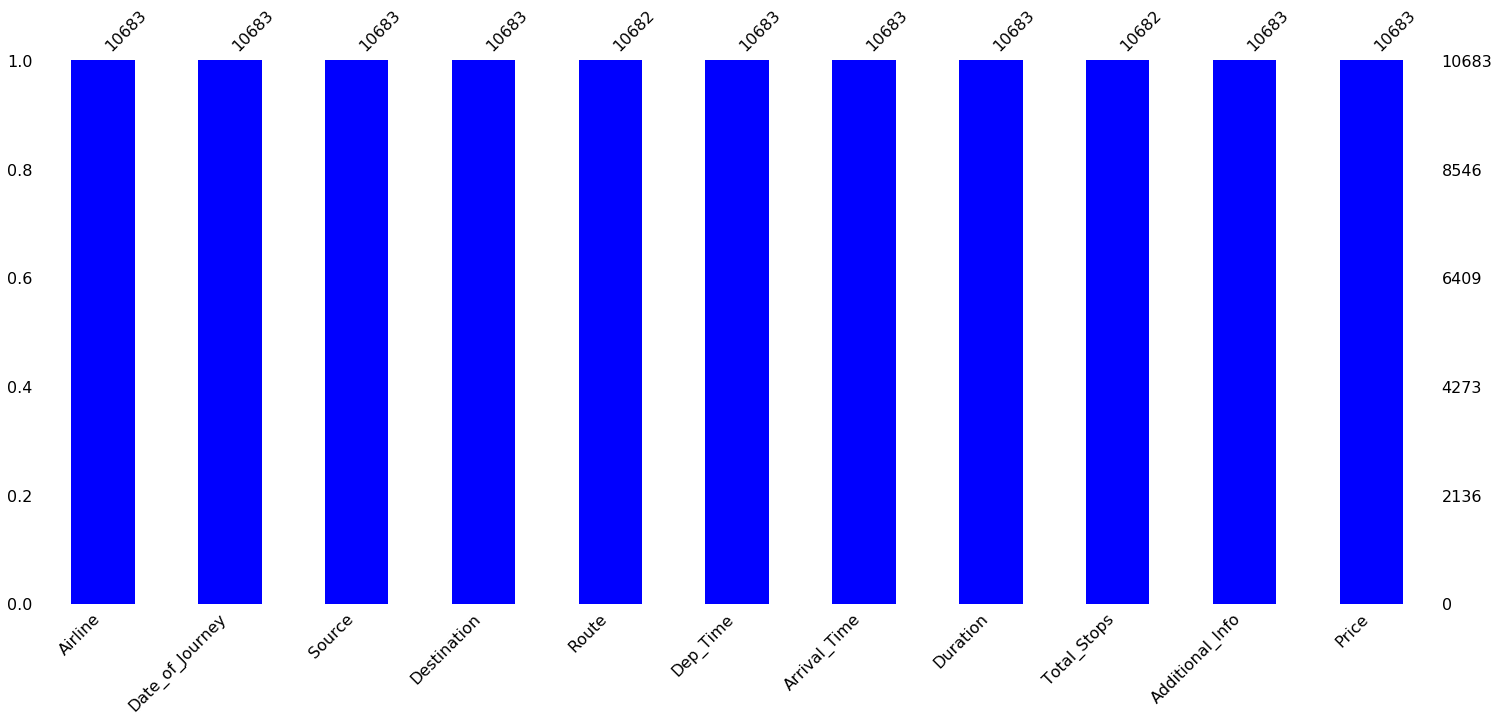

In [12]:
import missingno as mso#missingno是一个可视化缺失值的库，方便使用
mso.bar(df,color="blue")
plt.show()

## 缺失值删除
正常的字段是10683条，其中两个字段是10682条；缺失值的占比很小，考虑直接删除的数据

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## 时间相关字段处理
### 时间处理
通过pd.to_datetime()直接将字符型的数据转成时间类型的数据

通过dt.day或者df.month 直接获取天或者月的信息

In [15]:
# 将字段类型转成时间相关类型

def change_to_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [16]:
# 3个字段的转换

for col in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_to_datetime(col)

In [17]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

## 提取天和月
乘客旅程日期中（Date_of_Journey）单独提取天和月，作为两个字段

In [18]:
df["day"] = df["Date_of_Journey"].dt.day
df["month"] = df["Date_of_Journey"].dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-10 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-03-10 05:50:00,2022-03-10 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-03-10 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-03-10 18:05:00,2022-03-10 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-03-10 16:50:00,2022-03-10 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [19]:
# 删除字段
df.drop('Date_of_Journey', axis=1, inplace=True)

## 起飞时间和抵达时间处理

主要提取两个时间中的“小时”和“分钟”信息；同时删除原字段：

In [24]:
# 提取小时和分钟

def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

分别调用函数来提取信息：

In [26]:
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')
drop_col(df,'Dep_Time')  # 删除原字段

In [28]:
extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')
drop_col(df,'Arrival_Time')

In [29]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35


航班持续时间duration

1、将持续时间规范化处理，统一变成0h 1m

让我们对持续时间列应用预处理，将持续时间小时和分钟与持续时间分开

In [33]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [34]:
df['Duration']=duration

In [35]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35


In [37]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [38]:
df['dur_hour']=df['Duration'].apply(hour)

In [39]:
df['dur_min']=df['Duration'].apply(minutes)

In [40]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,11,0,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,10,55,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,8,5,0,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,8,10,55,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,19,25,15,7,50
